In [1]:
import torch
import albumentations as A
from albumentations.pytorch import ToTensorV2
import torch.nn as nn
import torch.optim as optim
from model import UNET
from dataloader import get_loaders_masks
import FILE_PATHS
import pandas as pd
from training_masks import(
    train, 
    plot_loss_curves
)

In [2]:
# Hyperparameters
LEARNING_RATE = 1e-4
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
BATCH_SIZE = 64
NUM_EPOCHS = 20
NUM_WORKERS = 4
IMAGE_HEIGHT = 112
IMAGE_WIDTH = 112
PIN_MEMORY = True
LOAD_MODEL = False



In [3]:
# Transformations
train_transforms = A.Compose(
    [
        A.Resize(height=IMAGE_HEIGHT, width=IMAGE_WIDTH),
        # A.Rotate(limit=35, p=1.0),
        # A.HorizontalFlip(p=0.5),
        # A.VerticalFlip(p=0.1),
        A.Normalize(
            mean=[0.0, 0.0, 0.0],
            std=[1.0, 1.0, 1.0],
            max_pixel_value=255.0,
        ),
        ToTensorV2(),
    ]
)

val_transforms = A.Compose(
    [
        A.Resize(height=IMAGE_HEIGHT, width=IMAGE_WIDTH),
        A.Normalize(
            mean=[0.0, 0.0, 0.0],
            std=[1.0, 1.0, 1.0],
            max_pixel_value=255.0,
        ),
        ToTensorV2(),
    ]
)

In [4]:
# MODEL
model = UNET(in_channels=3, out_channels=1).to(DEVICE)

loss_fn = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)
model_type = "masks"

In [5]:
# BATCHES
train_loader, val_loader = get_loaders_masks(
    FILE_PATHS.IMAGES,
    FILE_PATHS.MASKS,
    BATCH_SIZE,
    train_transforms,
    val_transforms,
    NUM_WORKERS,
    test_size=0.2,
    seed=42,
)

TRAIN PATHS LENGTHS: images, masks
15975, 15975
VALIDATION PATHS LENGTHS: images, masks
3994, 3994


In [6]:
model_0_results = train(model=model, 
                        train_dataloader=train_loader,
                        test_dataloader=val_loader,
                        optimizer=optimizer,
                        loss_fn=loss_fn, 
                        epochs=NUM_EPOCHS,
                        device=DEVICE)

  0%|          | 0/20 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 0.2497 | train_acc: 0.9675 | test_loss: 0.1845 | test_acc: 0.9802


  5%|▌         | 1/20 [16:20<5:10:33, 980.72s/it]

Epoch: 2 | train_loss: 0.1519 | train_acc: 0.9846 | test_loss: 0.1303 | test_acc: 0.9847


 10%|█         | 2/20 [33:10<4:59:19, 997.73s/it]

Epoch: 3 | train_loss: 0.1090 | train_acc: 0.9857 | test_loss: 0.0999 | test_acc: 0.9835


 15%|█▌        | 3/20 [48:57<4:36:07, 974.54s/it]

Epoch: 4 | train_loss: 0.0831 | train_acc: 0.9864 | test_loss: 0.0783 | test_acc: 0.9857


 20%|██        | 4/20 [1:04:47<4:17:19, 964.97s/it]

Epoch: 5 | train_loss: 0.0673 | train_acc: 0.9868 | test_loss: 0.0641 | test_acc: 0.9858


 25%|██▌       | 5/20 [3:46:15<17:07:38, 4110.56s/it]

Epoch: 6 | train_loss: 0.0561 | train_acc: 0.9874 | test_loss: 0.0555 | test_acc: 0.9862


 30%|███       | 6/20 [4:01:39<11:46:19, 3027.12s/it]

Epoch: 7 | train_loss: 0.0479 | train_acc: 0.9881 | test_loss: 0.0508 | test_acc: 0.9861


 35%|███▌      | 7/20 [4:17:15<8:27:43, 2343.33s/it] 

Epoch: 8 | train_loss: 0.0421 | train_acc: 0.9886 | test_loss: 0.0462 | test_acc: 0.9862


 40%|████      | 8/20 [4:33:12<6:20:26, 1902.20s/it]

Epoch: 9 | train_loss: 0.0372 | train_acc: 0.9893 | test_loss: 0.0469 | test_acc: 0.9851


 45%|████▌     | 9/20 [5:49:55<8:23:29, 2746.28s/it]

Epoch: 10 | train_loss: 0.0332 | train_acc: 0.9899 | test_loss: 0.0425 | test_acc: 0.9861


 50%|█████     | 10/20 [6:04:56<6:02:46, 2176.65s/it]

Epoch: 11 | train_loss: 0.0298 | train_acc: 0.9906 | test_loss: 0.0418 | test_acc: 0.9862


 55%|█████▌    | 11/20 [6:20:04<4:28:16, 1788.48s/it]

Epoch: 12 | train_loss: 0.0266 | train_acc: 0.9913 | test_loss: 0.0424 | test_acc: 0.9859


 60%|██████    | 12/20 [6:36:00<3:24:42, 1535.32s/it]

Epoch: 13 | train_loss: 0.0241 | train_acc: 0.9919 | test_loss: 0.0411 | test_acc: 0.9863


 65%|██████▌   | 13/20 [9:10:43<7:32:54, 3882.13s/it]

Epoch: 14 | train_loss: 0.0223 | train_acc: 0.9923 | test_loss: 0.0420 | test_acc: 0.9859


 70%|███████   | 14/20 [9:31:50<5:09:14, 3092.37s/it]

Epoch: 15 | train_loss: 0.0201 | train_acc: 0.9929 | test_loss: 0.0424 | test_acc: 0.9862


 75%|███████▌  | 15/20 [9:52:50<3:31:40, 2540.06s/it]

Epoch: 16 | train_loss: 0.0184 | train_acc: 0.9934 | test_loss: 0.0432 | test_acc: 0.9863


 80%|████████  | 16/20 [10:14:11<2:24:03, 2160.99s/it]

Epoch: 17 | train_loss: 0.0173 | train_acc: 0.9936 | test_loss: 0.0441 | test_acc: 0.9861


 85%|████████▌ | 17/20 [10:32:13<1:31:49, 1836.49s/it]

Epoch: 18 | train_loss: 0.0159 | train_acc: 0.9941 | test_loss: 0.0447 | test_acc: 0.9862


 90%|█████████ | 18/20 [10:47:09<51:47, 1553.99s/it]  

Epoch: 19 | train_loss: 0.0147 | train_acc: 0.9945 | test_loss: 0.0465 | test_acc: 0.9861


 95%|█████████▌| 19/20 [11:02:45<22:48, 1368.43s/it]

Epoch: 20 | train_loss: 0.0137 | train_acc: 0.9948 | test_loss: 0.0486 | test_acc: 0.9862


100%|██████████| 20/20 [11:18:38<00:00, 2035.90s/it]


In [7]:
filename = "../EchoNet-Dynamic/models/mask_model.pt"

In [8]:
torch.save(model, filename)

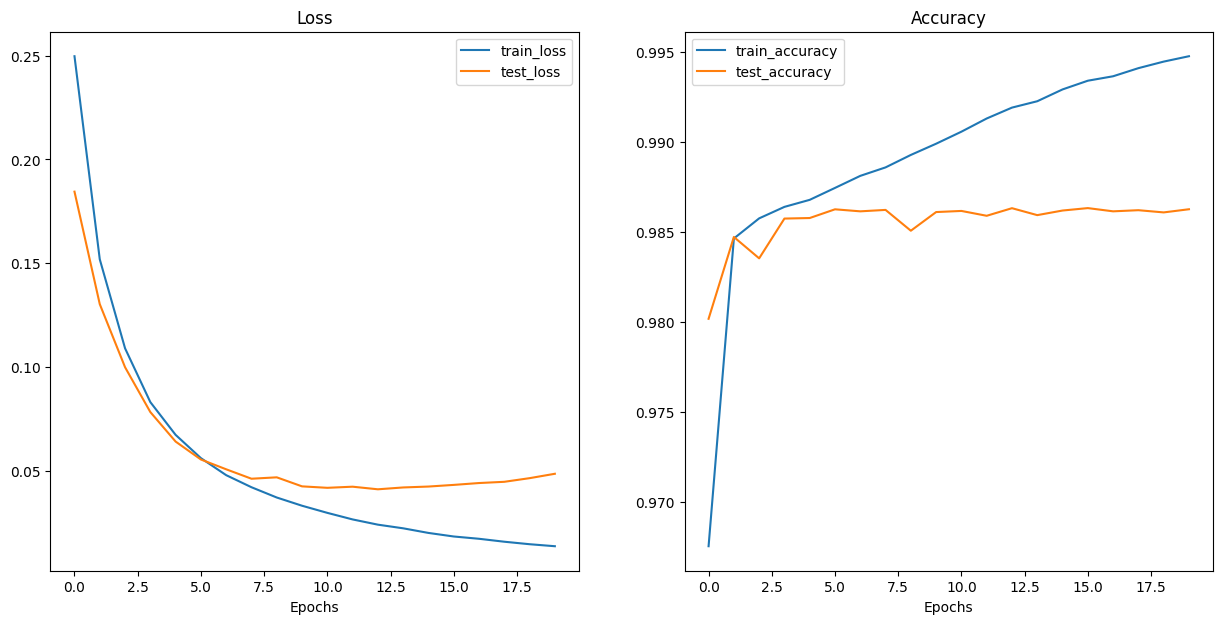

In [9]:
plot_loss_curves(model_0_results)

In [10]:
mask_model = pd.DataFrame(model_0_results)
mask_model.to_csv("mask_model.csv")

In [11]:
import cv2
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np
import os
import FILE_PATHS
from model import UNET

In [12]:
def read_video_and_predict(video_path):
    # Open the video file
    cap = cv2.VideoCapture(video_path)

    # Get the frames per second (fps) of the video
    fps = cap.get(cv2.CAP_PROP_FPS)

    # Calculate the time interval between frames
    frame_interval_ms = int(1000 / fps)

    # Initialize a variable to keep track of the current frame number
    frames_list = []
    predictions_list = []
    current_frame = 0

    # Loop through the video frames
    while True:
        # Set the video's position to the current frame
        cap.set(cv2.CAP_PROP_POS_FRAMES, current_frame)

        # Read the frame
        ret, frame = cap.read()

        # Check if the frame was successfully read
        if not ret:
            break

        frames_list.append(frame)
        """
        # Display the frame using matplotlib
        plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
        plt.title(f"Frame {current_frame}")
        plt.show()
        """

        # Increment the current frame number based on the frame interval
        current_frame += 1

    # Release the video capture object
    cap.release()

    return frames_list, predictions_list

In [13]:
videos_path = f"{FILE_PATHS.NEW_DATA}"
videos_filesnames = os.listdir(videos_path)
sample_vid_path = f"{videos_path}/{videos_filesnames[2]}"
#sample_vid_path = "../EchoNet-Dynamic/videos/0X1A0A263B22CCD966.avi"

In [14]:
frames_list, predictions_list = read_video_and_predict(sample_vid_path)

In [15]:
frame = frames_list[0]
frame = cv2.resize(frame, (112, 112))
frame = frame / 255.0
frame = np.array(frame)
frame_sample = frame

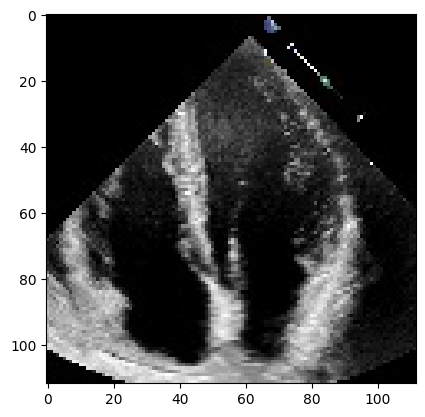

In [16]:
plt.imshow(frame)
plt.show()

In [17]:
frame = frames_list[0]
frame = cv2.resize(frame, (112, 112))
frame = np.array(frame)
frame = torch.from_numpy(frame)
frame = frame.to(DEVICE)
frame = frame.permute(2, 1, 0)
frame = frame.unsqueeze(0)
frame = frame.float()

In [18]:
pred = None
with torch.inference_mode():
    pred_tensor = torch.sigmoid(model(frame))

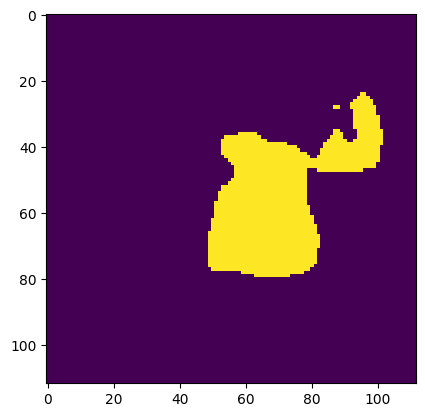

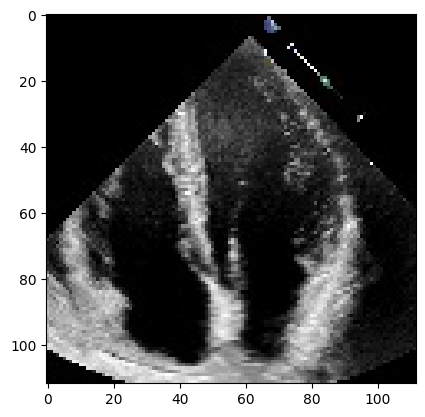

In [19]:
pred = pred_tensor.squeeze(0)
pred = pred.squeeze(0)
pred.shape
pred = pred.to("cpu").numpy()
pred = (pred >= 0.5)
plt.imshow(pred)
plt.show()

plt.imshow(frame_sample)
plt.show()